In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/DataSet_Plant_Disease.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
# Initialising the CNN

CNN_Classifier =Sequential();

In [ ]:
# Step 1 - Convolution
CNN_Classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
# Step 2 - Pooling
CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Step 1 - Convolution
CNN_Classifier.add(Conv2D(16,(3,3),activation='relu'))

In [ ]:
# Step 2 - Pooling
CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# Step 3 - Flattening
CNN_Classifier.add(Flatten())

In [ ]:
# Step 4 - Full connection
from keras.layers import Activation
CNN_Classifier.add(Dense(units=128, activation='relu'))
CNN_Classifier.add(Dense(units=38, activation='softmax'))

In [ ]:
# Compiling the CNN
CNN_Classifier.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/DataSet_Plant_Disease/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 54305 images belonging to 38 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/DataSet_Plant_Disease/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 22319 images belonging to 38 classes.


In [ ]:
#test_set[0]

(array([[[[0.5882353 , 0.6431373 , 0.7490196 ],
          [0.58431375, 0.6392157 , 0.74509805],
          [0.6       , 0.654902  , 0.7607844 ],
          ...,
          [0.60784316, 0.5764706 , 0.627451  ],
          [0.64705884, 0.6156863 , 0.6666667 ],
          [0.6156863 , 0.58431375, 0.63529414]],
 
         [[0.6       , 0.654902  , 0.7607844 ],
          [0.627451  , 0.68235296, 0.78823537],
          [0.6117647 , 0.6666667 , 0.7725491 ],
          ...,
          [0.60784316, 0.5764706 , 0.627451  ],
          [0.6039216 , 0.57254905, 0.62352943],
          [0.63529414, 0.6039216 , 0.654902  ]],
 
         [[0.627451  , 0.68235296, 0.78823537],
          [0.62352943, 0.6784314 , 0.7843138 ],
          [0.62352943, 0.6784314 , 0.7843138 ],
          ...,
          [0.60784316, 0.5764706 , 0.627451  ],
          [0.62352943, 0.5921569 , 0.6431373 ],
          [0.6509804 , 0.61960787, 0.67058825]],
 
         ...,
 
         [[0.6117647 , 0.6509804 , 0.7490196 ],
          [0.59215

In [ ]:
CNN_Classifier.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 15,
                         validation_data = test_set,
                         validation_steps = 200)

Epoch 1/15
1000/1000 [==============================] - 78s 78ms/step - loss: 0.2577 - accuracy: 0.9149 - val_loss: 0.2064 - val_accuracy: 0.9322
Epoch 2/15
1000/1000 [==============================] - 78s 78ms/step - loss: 0.2433 - accuracy: 0.9208 - val_loss: 0.2131 - val_accuracy: 0.9275
Epoch 3/15
1000/1000 [==============================] - 78s 78ms/step - loss: 0.2232 - accuracy: 0.9275 - val_loss: 0.2161 - val_accuracy: 0.9250
Epoch 4/15
1000/1000 [==============================] - 78s 78ms/step - loss: 0.2269 - accuracy: 0.9243 - val_loss: 0.1856 - val_accuracy: 0.9355
Epoch 5/15
1000/1000 [==============================] - 78s 78ms/step - loss: 0.2184 - accuracy: 0.9260 - val_loss: 0.1865 - val_accuracy: 0.9373
Epoch 6/15
1000/1000 [==============================] - 78s 78ms/step - loss: 0.2117 - accuracy: 0.9311 - val_loss: 0.1882 - val_accuracy: 0.9370
Epoch 7/15
1000/1000 [==============================] - 78s 78ms/step - loss: 0.2062 - accuracy: 0.9314 - val_loss: 0.2369 -

In [ ]:
 CNN_Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

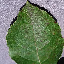

In [ ]:
# Predictions for diseases image using train model
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/DataSet_Plant_Disease/single_prediction/0b1e31fa-cbc0-41ed-9139-c794e6855e82___FREC_Scab 3089.JPG', target_size =(64,64))

test_image 

In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

test_image = test_image / 255

In [ ]:
# predicting the test result
y_pred = CNN_Classifier.predict(test_image)
#test_y_class = np.argmax(test_image,axis=-1)
#_pred_class = np.argmax(y_pred,axis=-1)
y_pred_class = np.argmax(CNN_Classifier.predict(test_image), axis=-1)
y_pred_class


array([0])

In [ ]:
training_set.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
y_pred_class[0]

0

In [ ]:
if y_pred_class[0] == 0:
  Prediction = 'Apple___Apple_scab'
  print(Prediction)
elif y_pred_class[0] == 1:
  Prediction = 'Apple___Black_rot'
  print(Prediction)
elif y_pred_class[0] == 2:
  Prediction = 'Apple___Cedar_apple_rust'
  print(Prediction)
elif y_pred_class[0] == 3:
  Prediction = 'Apple___healthy' 
  print(Prediction)
elif y_pred_class[0] == 4:
  Prediction = 'Blueberry___healthy' 
  print(Prediction)
elif y_pred_class[0] == 5:
  Prediction = 'Cherry_(including_sour)___Powdery_mildew'
  print(Prediction)
elif y_pred_class[0] == 6:
  Prediction = 'Cherry_(including_sour)___healthy'
  print(Prediction)
elif y_pred_class[0] == 7:
  Prediction = 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
  print(Prediction)
elif y_pred_class[0] == 8:
  Prediction = 'Corn_(maize)___Common_rust_'
  print(Prediction)
elif y_pred_class[0] == 9:
  Prediction = 'Corn_(maize)___Northern_Leaf_Blight'
  print(Prediction)
elif y_pred_class[0] == 10:
  Prediction = 'Corn_(maize)___healthy'
  print(Prediction)
elif y_pred_class[0] == 11:
  Prediction = 'Grape___Black_rot'
  print(Prediction)
elif y_pred_class[0] == 12:
  Prediction = 'Grape___Esca_(Black_Measles)'
  print(Prediction)
elif y_pred_class[0] == 13:
  Prediction = 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
  print(Prediction)
elif y_pred_class[0] == 14:
  Prediction = 'Grape___healthy'
  print(Prediction)
elif y_pred_class[0] == 15:
  Prediction = 'Orange___Haunglongbing_(Citrus_greening)'
  print(Prediction)
elif y_pred_class[0] == 16:
  Prediction = 'Peach___Bacterial_spot'
  print(Prediction)
elif y_pred_class[0] == 17:
  Prediction = 'Peach___healthy'
  print(Prediction)
elif y_pred_class[0] == 18:
  Prediction = 'Pepper,_bell___Bacterial_spot'
  print(Prediction)
elif y_pred_class[0] == 19:
  Prediction = 'Pepper,_bell___healthy'
  print(Prediction)
elif y_pred_class[0] == 20:
  Prediction = 'Potato___Early_blight'
  print(Prediction)
elif y_pred_class[0] == 21:
  Prediction = 'Potato___Late_blight'
  print(Prediction)
elif y_pred_class[0] == 22:
  Prediction = 'Potato___healthy'
  print(Prediction)
elif y_pred_class[0] == 23:
  Prediction = 'Raspberry___healthy'
  print(Prediction)
elif y_pred_class[0] == 24:
  Prediction = 'Soybean___healthy'
  print(Prediction)
elif y_pred_class[0] == 25:
  Prediction = 'Squash___Powdery_mildew'
  print(Prediction)
elif y_pred_class[0] == 26:
  Prediction = 'Strawberry___Leaf_scorch'
  print(Prediction)
elif y_pred_class[0] == 27:
  Prediction = 'Strawberry___healthy'
  print(Prediction)
elif y_pred_class[0] == 28:
  Prediction = 'Tomato___Bacterial_spot'
  print(Prediction)
elif y_pred_class[0] == 29:
  Prediction = 'Tomato___Early_blight'
  print(Prediction)
elif y_pred_class[0] == 30:
  Prediction = 'Tomato___Late_blight'
  print(Prediction)
elif y_pred_class[0] == 31:
  Prediction = 'Tomato___Leaf_Mold'
  print(Prediction)
elif y_pred_class[0] == 32:
  Prediction = 'Tomato___Septoria_leaf_spot'
  print(Prediction)
elif y_pred_class[0] == 33:
  Prediction = 'Tomato___Spider_mites Two-spotted_spider_mite'
  print(Prediction)
elif y_pred_class[0] == 34:
  Prediction = 'Tomato___Target_Spot'
  print(Prediction)
elif y_pred_class[0] == 35:
  Prediction = 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
  print(Prediction)
elif y_pred_class[0] == 36:
  Prediction = 'Tomato___Tomato_mosaic_virus'
  print(Prediction)
else:
  Prediction = 'Tomato___healthy'
  print(Prediction)

Apple___Apple_scab
